In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

#Exercise 3.1: Convergence of sequences:#

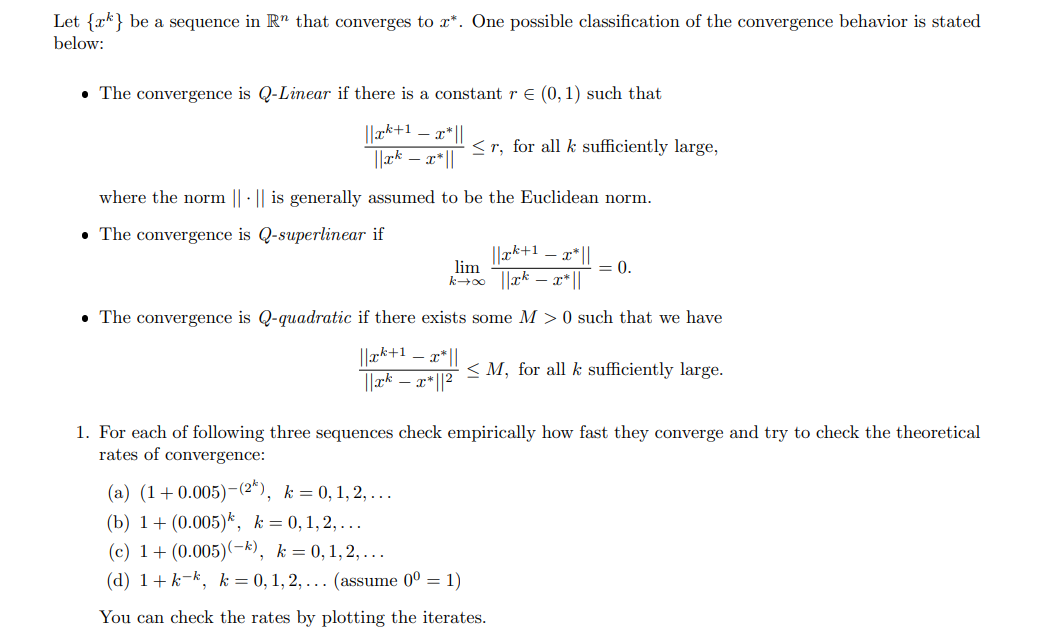

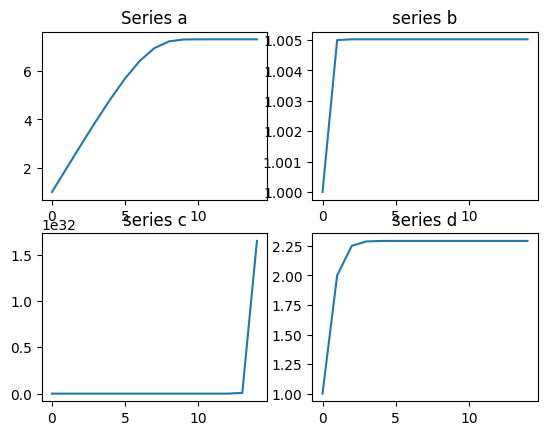

In [ ]:
def a(k, suma):
    suma = suma + (1.005)**(-2**(k))
    return suma

def b(k, sumb):
    sumb = sumb + (0.005)**(k)
    return sumb

def c(k, sumc):
    sumc = sumc + (0.005)**(-k)
    return sumc

def d(k, sumd):
    sumd = sumd + k**(-k)
    return sumd


sa = 0
sb = 0
sc = 0
sd = 0

k_val = []

a_val = []
b_val = []
c_val = []
d_val = []

for i in range(15):

    k_val.append(i)

    sa = a(i,sa)
    a_val.append(sa)


    sb = b(i,sb)
    b_val.append(sb)


    sc = c(i,sc)
    c_val.append(sc)


    sd = d(i,sd)
    d_val.append(sd)

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)


axis[0, 0].plot(k_val, a_val)
axis[0, 0].set_title("Series a")

axis[0, 1].plot(k_val, b_val)
axis[0, 1].set_title("series b")

axis[1, 0].plot(k_val, c_val)
axis[1, 0].set_title("series c")

axis[1, 1].plot(k_val, d_val)
axis[1, 1].set_title("series d")

# Combine all the operations and display
plt.show()

Series C does not converge to a particular point.

#Exercise 3.2: Data Preparation Exercise (PREP)#

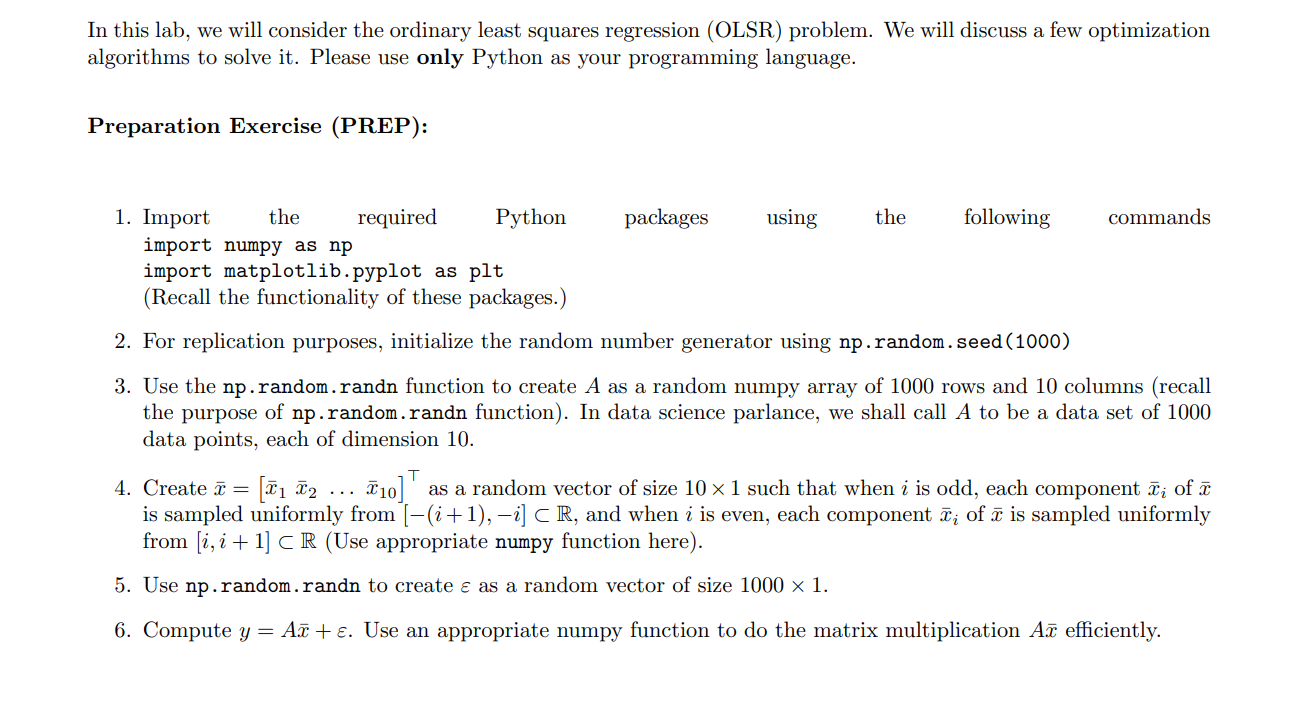

In [ ]:
#first we prepare our data

np.random.seed(1000)

#now to obtain A
A = np.random.randn(1000,10)

#now to obtain x_bar
x_bar = np.zeros((10,1))

for j in range(10):

    i = j+1

    if ((i)%2 == 1): #odd
      x_bar[j] = (-i + (i+1)) * np.random.random_sample() - (i+1) #(b - a) * random_sample() + a; for the  range [a,b]

    if (i%2 == 0): #even
      x_bar[j] = ((i+1) - i) * np.random.random_sample() + (i) #(b - a) * random_sample() + a; for the  range [a,b]


#now to obtain e (noise)
e = np.random.randn(1000,1)

#finally to obtain y
y = A @ x_bar + e

print("A = ", A)
print("x_bar = ", x_bar)
print("Y = ", y)

A =  [[-0.8044583   0.32093155 -0.02548288 ... -0.47998308  0.5950355
  -0.46466753]
 [ 0.66728131 -0.80611561 -1.19606983 ...  0.70569237  1.27179528
  -0.98674733]
 [-0.33483545 -0.0994817   0.4071921  ... -0.38314741 -0.82294096
   1.60008337]
 ...
 [ 0.4520184  -0.47786694 -1.9209351  ... -0.91576825  1.28648295
   1.96612251]
 [ 1.5847291   1.04574815  1.74030946 ... -0.95352929  0.74063574
   1.35391039]
 [-1.27767888  0.60413859 -0.81028802 ... -0.06434491  0.50570314
  -1.63094421]]
x_bar =  [[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]
Y =  [[-3.84943546e+00]
 [-1.25706891e+01]
 [ 3.63121599e+01]
 [ 3.63405580e+01]
 [ 5.55093942e+00]
 [-7.82253463e+00]
 [-1.75872918e+01]
 [ 2.84011753e+01]
 [ 2.21735533e+01]
 [ 2.11419615e+01]
 [-3.01675507e+01]
 [ 2.02515788e+01]
 [ 6.33261119e+00]
 [-1.14486907e+00]
 [ 1.83388972e+01]
 [-1.53530539e+01]
 [-4.56793958e+01]
 [ 5.72204724e+0

# Exercise 1 Part 3

Implementing newton's method with backtracking line search

In [ ]:
#first we will define the function, its gradient and the hessian

def func(A,Y,x):
    f = 0.5 * (np.linalg.norm(A @ x - y))**2
    return f

def grad(A,Y,x):

    #for the OLS the gradient is equal to
    # A^T (Ax - Y)

    g = A.T @ A @ x - A.T @ Y

    return g

def hess(A,Y,x):

    #we define hessian as the double derivative of the function f
    #hence we simple take the derivative of the gradient
    #anyways the dimensions are independent of each other

    h = A.T @ A

    return h


# Define tolerance level
def tolerance(p):
    return 10 ** (-p)

# Define the newton optimisation algorithm
def newton_opt(x, A, y, p):

        history = []
        TLevel = tolerance(p)
        count = 0

    # Perform the newton optimisation iterations

        while (np.linalg.norm(grad(A, y, x)) > TLevel):

            h = hess(A,y, x)
            hess_inv = np.linalg.inv(h)


            #initialise values for our a, gamma, and p
            a = 0.99
            gamma = 0.5
            p = 0.5

            d = -grad(A,y,x)

            #now a loop to conduct inexact line search
            while (func(A,y,x + a*d ) > (func(A,y,x) + gamma*a*(grad(A,y,x).T@d))):
                a = p*a


            # Update the parameters
            x = x + a * hess_inv @ d

            # Save the history of the parameters
            history.append((x, func(A,y, x), count))

            #count the iterations for convergence
            count = count+1


            #print(hess_inv)
            #print(a)
            #print(count)

            #print(x)
            #print(np.linalg.norm(grad(A, y, x)))
            #print()


        return x, func(A,y,x), count, history

In [ ]:
#first we define tolerance level
p=4

#now the start points
x0 = np.zeros((10,1))

x_star, f_star, count, history = newton_opt(x0, A, y, p)

print("x_bar = ", x_bar)
print()
print("x_star = ", x_star)

x_bar =  [[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]

x_star =  [[-1.04982253]
 [ 2.95189742]
 [-3.34298191]
 [ 4.60956005]
 [-5.71176192]
 [ 6.89877615]
 [-7.62879355]
 [ 8.16821108]
 [-9.22221195]
 [10.05669288]]


Between $x^*$ and $x^-$ we observe that, due to a slightly low tolerance $10^{-4}$, we don't get very precise values.

Now for the plots

The first plot is

$log(||x^* - x^k||_2)$ vs the number of iterations $k$

The second plot is

$log(|f(x^*) - f(x^k)|)$ vs the number of iterations $k$

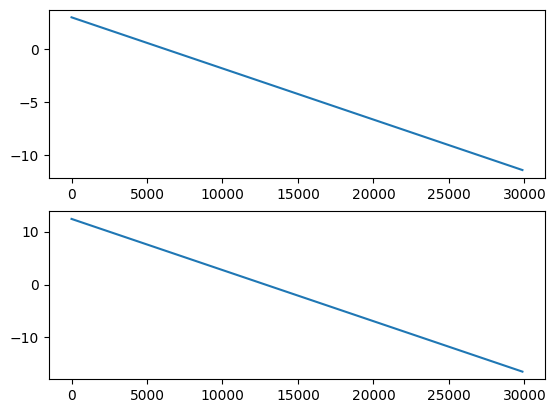

In [ ]:
I = []
x_val = []
fx_val = []



for i in range(count - 10000):
    I.append(history[i][2])
    x_val.append(m.log(np.linalg.norm(history[i][0] - x_star)))
    fx_val.append(m.log(abs(history[i][1] - f_star)))

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(I, x_val)
ax2.plot(I, fx_val)



This method takes quite a few iterations to converge.

This is most likely because the inverse of the hessian matrix at each step is relatively small (consisting of small values). Hence slowing down the rate of convergence.

# Exercise 1 Part 4

BFGS method

In [ ]:
def func(A,Y,x):
    f = 0.5 * (np.linalg.norm(A @ x - Y))**2
    return f

def grad(A,Y,x):

    #for the OLS the gradient is equal to
    # A^T (Ax - Y)

    g = A.T @ A @ x - A.T @ Y #error with second part with either A or Y

    return g


def hess(A,Y,x):

    #we define hessian as the double derivative of the function f
    #hence we simple take the derivative of the gradient
    #anyways the dimensions are independent of each other

    h = A.T @ A

    return h


# Define tolerance level
def tolerance(p):
    return 10 ** (-p)


def L2_norm(g):
    return np.linalg.norm(g)


def BFGS_line_search(x, A, y, B0, p):

    g = grad(A,y,x)

    history = []
    TLevel = tolerance(p)
    count = 0

    while (L2_norm(g) > TLevel):

        #initialising line search parameters

        a0 = 0.99
        p = 0.5
        gamma = 0.5

        #initialising the direction parameter

        d =  - B0 @ g

        #now the line search loop

        while (func(A,y,x + a0*d) > func(A,y,x) + gamma*a0*g.T@ d): # Check the RHS once, whether it is supposed to be g.T @ d or d.T @ d
            a0 = a0 * p


        #initialising storage matrices
        x_old = np.zeros((10,1))
        x_new = np.zeros((10,1))

        #storing old values of x_k
        x_old = x

        #computing x_(k+1)
        x = x + a0*d

        #storing x_(k+1)
        x_new = x


        #Intitialising BFGS parameters
        s = np.zeros((10,1))
        z = np.zeros((10,1))
        I = np.identity(10)

        #giving values to these two their values
        s = x_new - x_old
        z = grad(A, y, x_new) - grad(A, y, x_old)

        #Updating B using s and y
        B0 = (I - (1/(s.T @ z))* s @ z.T) @ B0 @ (I - (1/(s.T @ z))* z @ s.T) + (1/(s.T @ z))* s @ s.T

        #now updating the gradient
        g = grad(A, y, x)

        # Save the history of the parameters
        history.append((x, func(A, y, x), count))

        #count the iterations for convergence
        count = count+1


    return x, func(A,y, x), count, history

In [ ]:
#first we define tolerance level
p=4

#now the start points
x0 = np.zeros((10,1))


#taking b0 as identity matrix
b0 = np.identity(10)

x_star, f_star, count, history = BFGS_line_search(x0, A, y, b0, p)

print("x_bar = ", x_bar)
print()
print("x_star = ", x_star)

x_bar =  [[-1.06258705]
 [ 2.94307072]
 [-3.34150552]
 [ 4.58252615]
 [-5.75947573]
 [ 6.93512469]
 [-7.61893094]
 [ 8.16818187]
 [-9.2179964 ]
 [10.00022174]]

x_star =  [[-1.04982253]
 [ 2.95189743]
 [-3.34298192]
 [ 4.60956007]
 [-5.71176195]
 [ 6.89877618]
 [-7.62879358]
 [ 8.16821111]
 [-9.22221199]
 [10.05669293]]


Once again, the precision for this method isn't the best due to our tolerance. which is $10^{-4}$.

In fact, the calculated value for $x^*$ done by both Newton's method and BFGS method is nearly the same.

Now for the plots

The first plot is

$log(||x^* - x^k||_2)$ vs the number of iterations $k$

The second plot is

$log(|f(x^*) - f(x^k)|)$ vs the number of iterations $k$

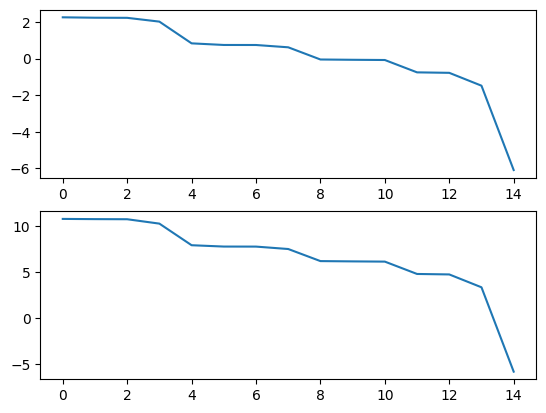

In [ ]:
I = []
x_val = []
fx_val = []



for i in range(count-3): #adjusting range to avoid domain error in log
    I.append(history[i][2])
    x_val.append(m.log(np.linalg.norm(history[i][0] - x_star)))
    fx_val.append(m.log(abs(history[i][1] - f_star)))

fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(I, x_val)
ax2.plot(I, fx_val)

This one converges quite fast actually.

It took about 17 or 18 iterations to solve.

I think the estimation for an inverse hessian is more beneficial in some cases, as the estimate would tend to avoid such small values. Hence increasing rate of convergence.

# Exercise 1 Part 5

BFGS method is a lot faster than Newton's method.

The reason I believe for this, is simply due to the fact that the hessian inverse is quite small and hence can lead to slower convergence.

Although BFGS method requires us to estimate a hessian matrix at every step, which can be computationally heavy, it manages to avoid relatively smaller values for the estimated hessian inverse, hence increasing convergence.